In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

In [3]:
data = pd.read_excel("single-family-home-sales.xlsx")

In [4]:
data.head()

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2
0,1990-01,45.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,58.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,50.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2
67,1995-08,63.0,NaN,NaN,NaN,NaN,NaN,NaN
68,1995-09,55.0,NaN,NaN,NaN,NaN,NaN,NaN
69,1995-10,54.0,NaN,NaN,NaN,NaN,NaN,NaN
70,1995-11,44.0,NaN,NaN,NaN,NaN,NaN,NaN
71,1995-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


forecast = weight(t) * y(t) + weight(t-1) * y(t-1) + ... + ((1-alpha)^n) * y(n)

weight(t) = alpha*(1-alpha) ^ t

If alpha = 0.8

In [6]:
data[::-1].iloc[1:, :].shape[0]

71

## Exponential smoothing

In [7]:
alpha = 0.2
offset = data[::-1].iloc[1:, :].shape[0]
es_sum = 0 

for i,row in data[::-1].iloc[1:, :].iterrows():
    val = row["Home Sales"]
    t = offset - i -1
    if t != offset:
        weight = alpha * ((1-alpha) ** t) 
    else:
        weight = (1-alpha) ** t 
    
    es_sum += weight * val

In [8]:
es_sum

54.838020063318474

# Champagne Dataset

In [9]:
champagne_data = pd.read_excel("champagne-sales.xlsx")

In [10]:
champagne_data.head()

,Month,Champagne Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [11]:
champagne_data.set_index("Month", inplace=True)

In [12]:
y = champagne_data["Champagne Sales"].resample('M').mean()

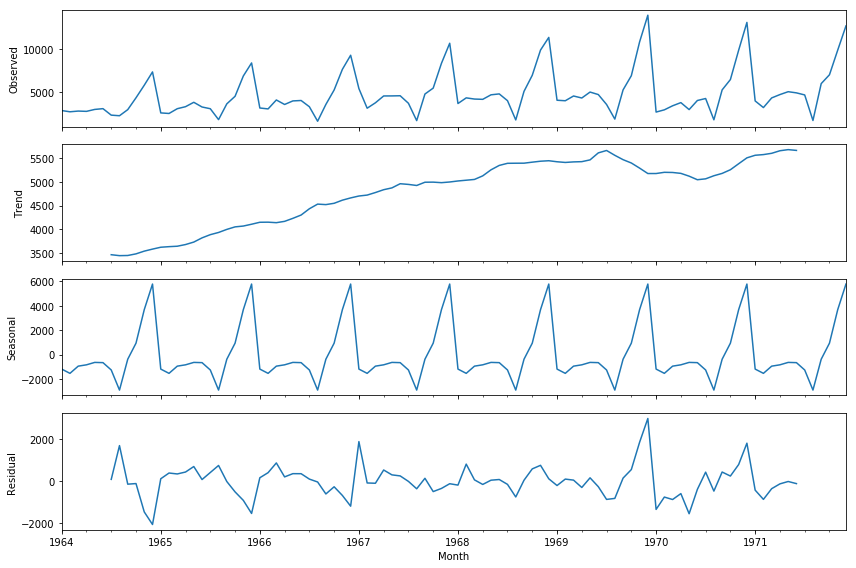

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(champagne_data, model='additive')
fig = decomposition.plot()
plt.show()

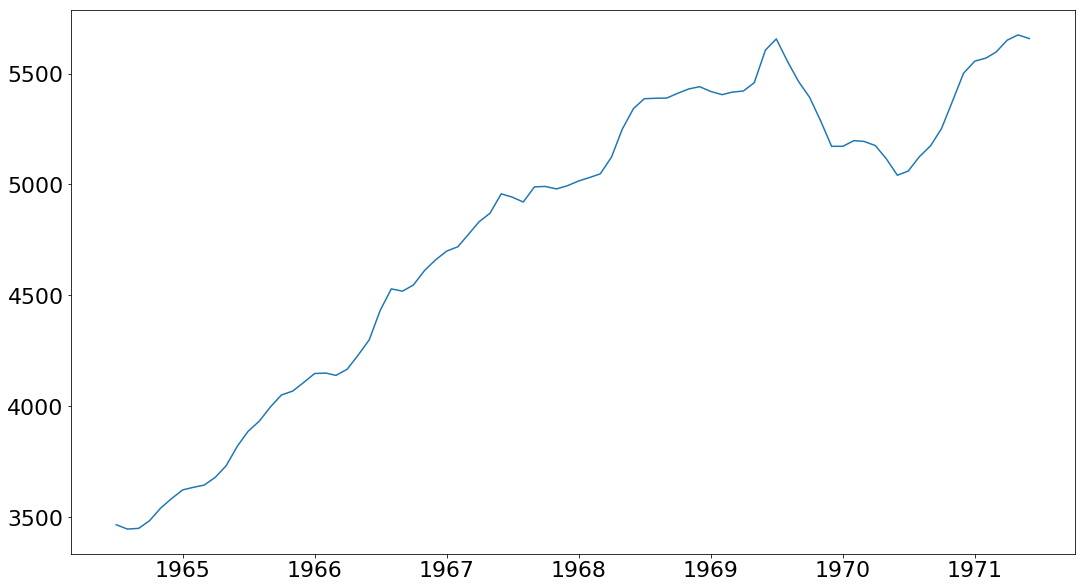

In [36]:
plt.plot(decomposition.trend)
plt.savefig("Trend Component")

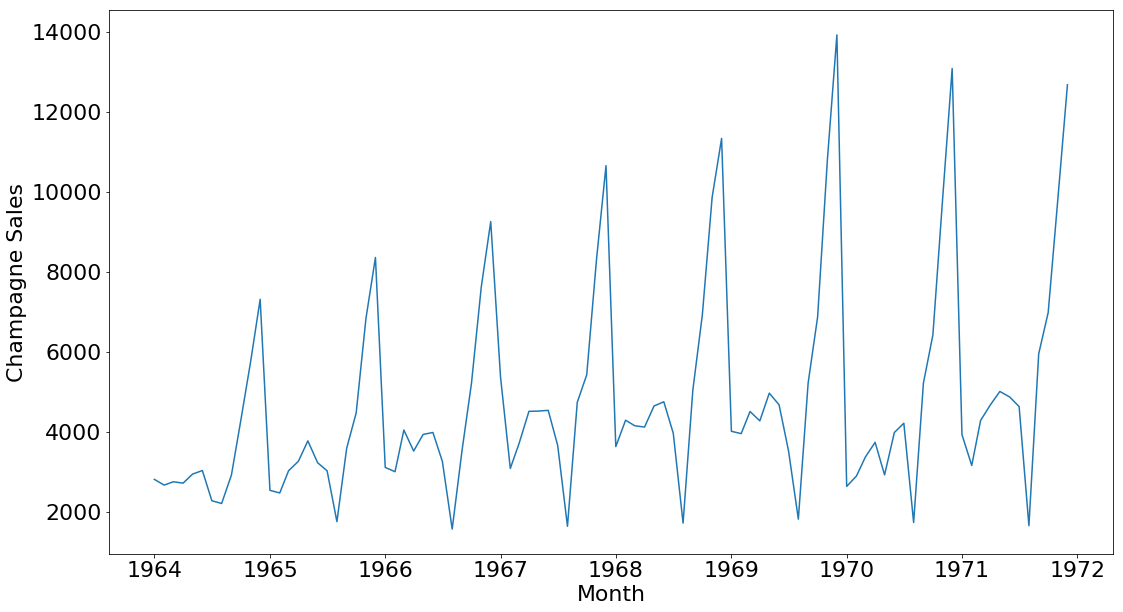

In [14]:
rcParams['figure.figsize'] = 18, 10
plt.rcParams.update({'font.size': 22})
plt.plot(champagne_data["Champagne Sales"])
plt.xlabel("Month")
plt.ylabel("Champagne Sales")
plt.savefig("champagne_sales")

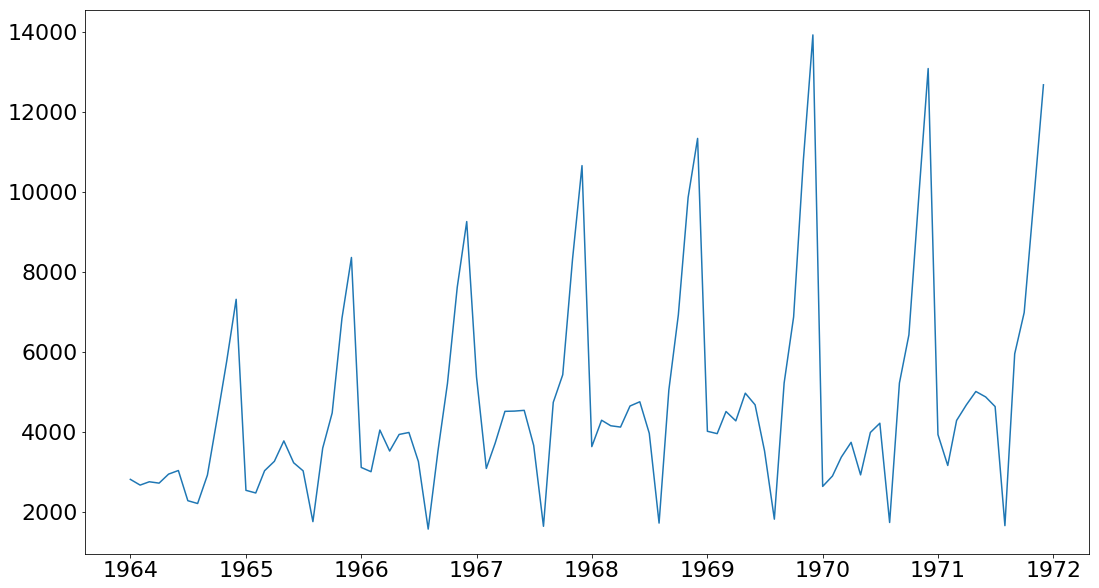

In [15]:
plt.plot(decomposition.observed)

For ETS <br>
How should the error component be applied? <br>
Multiplicative (Why?) <br>
How should the trend component be applied? <br>
None (Why?) <br>
How should the seasonal component be applied? <br>
Multiplicative (Why?) <br>

In [16]:
model = ES(endog=champagne_data[champagne_data.index < "1971-07-01"]["Champagne Sales"], trend=None, damped=False, seasonal="mul", seasonal_periods=12, dates=None, freq=None, missing='none').fit()

C:\Users\NDH00158\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NDH00158\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [17]:
model.predict(start="1971-07-01", end="1971-12-01")

C:\Users\NDH00158\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1971-07-01     4070.617879
1971-08-01     2146.854066
1971-09-01     5163.792695
1971-10-01     6786.890643
1971-11-01    10159.902611
1971-12-01    12749.869689
Freq: MS, dtype: float64

In [18]:
champagne_data.tail()

,Champagne Sales
Month,
1971-08-01,1659
1971-09-01,5951
1971-10-01,6981
1971-11-01,9851
1971-12-01,12670


### Arima model on champagne dataset

In [19]:
mod = sm.tsa.statespace.SARIMAX(endog=champagne_data[champagne_data.index < "1971-07-01"]["Champagne Sales"], trend='n', order=(1,0,0), seasonal_order=(1,1,0,12)).fit()

C:\Users\NDH00158\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [20]:
mod.forecast(steps=6)

C:\Users\NDH00158\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1971-07-01     4388.098929
1971-08-01     1824.201733
1971-09-01     5244.775354
1971-10-01     6481.872631
1971-11-01     9952.753754
1971-12-01    13171.538076
Freq: MS, dtype: float64

### Shampoo sales dataset

In [21]:
shampoo_data = pd.read_csv("shampoo-sales.csv")

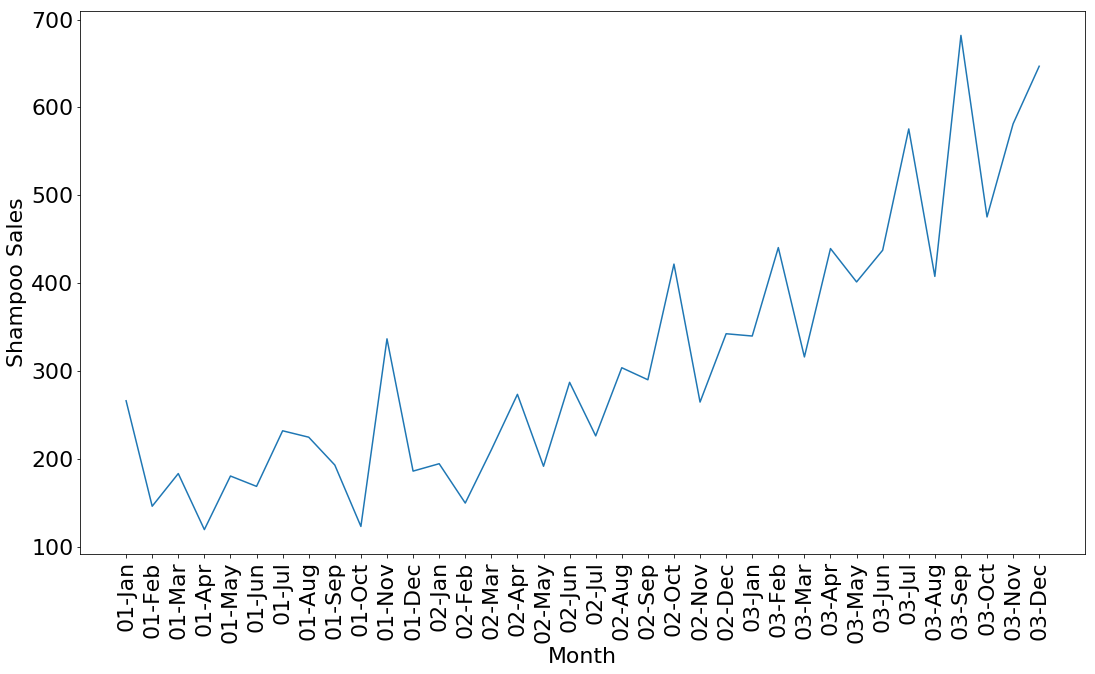

In [22]:
plt.xticks(rotation='vertical')
plt.plot(shampoo_data["Month"], shampoo_data["Sales"])
plt.xlabel("Month")
plt.ylabel("Shampoo Sales")
plt.savefig("upward_trend")

In [23]:
data_lynx = pd.read_csv("lynx.csv")

In [24]:
data_lynx.head()

,Unnamed: 0,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475


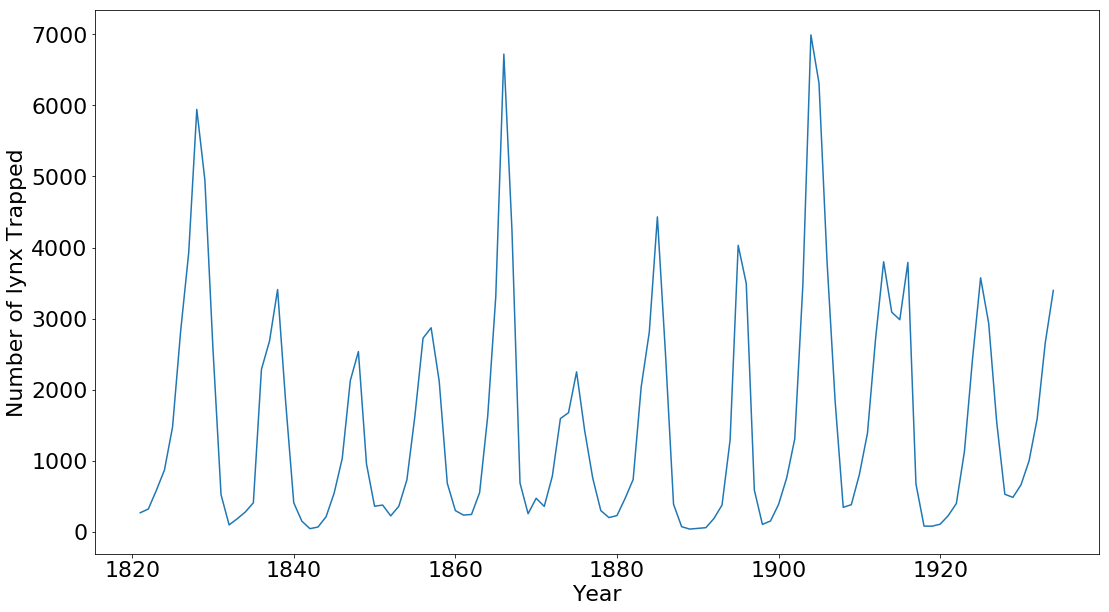

In [25]:
plt.xlabel("Year")
plt.ylabel("Number of lynx Trapped")
plt.plot(data_lynx["time"], data_lynx["value"])
plt.savefig("Cyclical")